# Time series Analysis with simple forecasting methods(ave, naive, snaive)


In [4]:
library(fpp2)
library(readxl) 
library(tidyverse)
library(forecast)
library(urca)

### Extract time series from Retail Data Excel

In [6]:
myts <- read_xlsx("RetailDataETF5231.xlsx", skip=3) %>%
  pull("5") %>%
  ts(start = c(1982,4), frequency = 12)

### Q1 What is your data about? 
* Produce appropriate plots in order to become familiar with your data. 

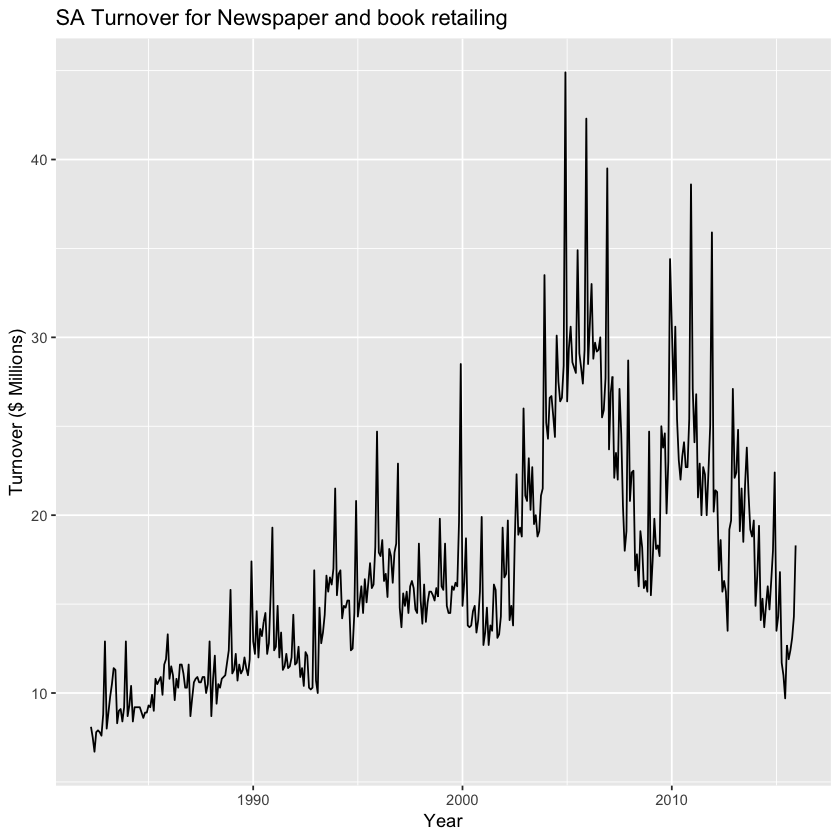

In [7]:
#time plot
autoplot(myts)+
  xlab("Year")+
  ylab("Turnover ($ Millions)")+
  ggtitle("SA Turnover for Newspaper and book retailing")

* Data is about a time series represents the monthly turnover in millions AUD for Hardware, building and garden supplies retailing in South Australia from April 1982 to December 2015.

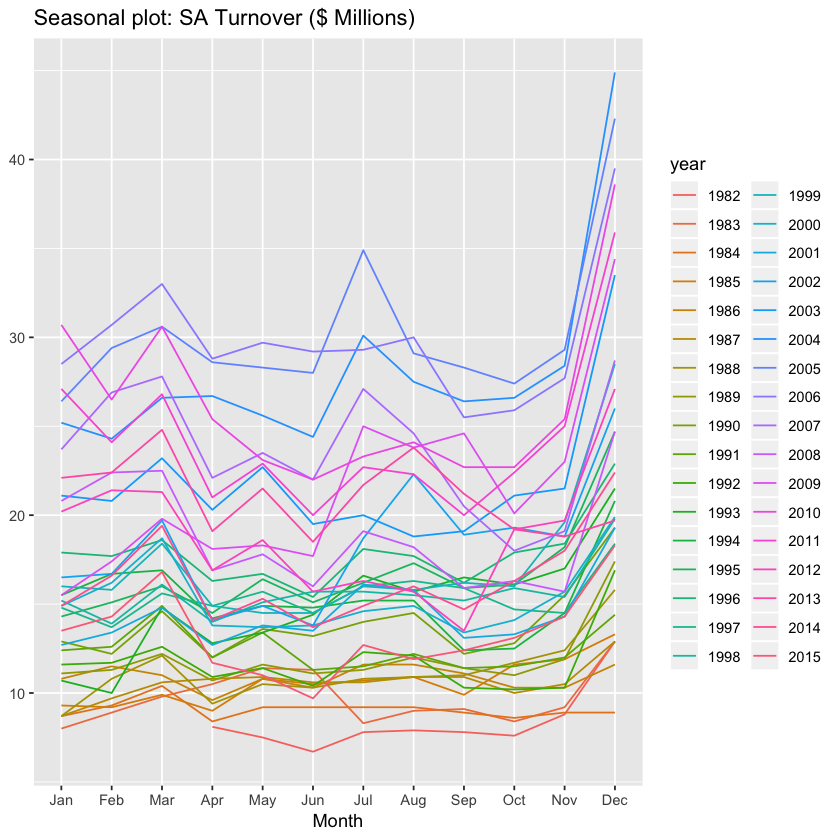

In [8]:
#ggseasonplot
ggseasonplot(myts) + ggtitle("Seasonal plot: SA Turnover ($ Millions)")

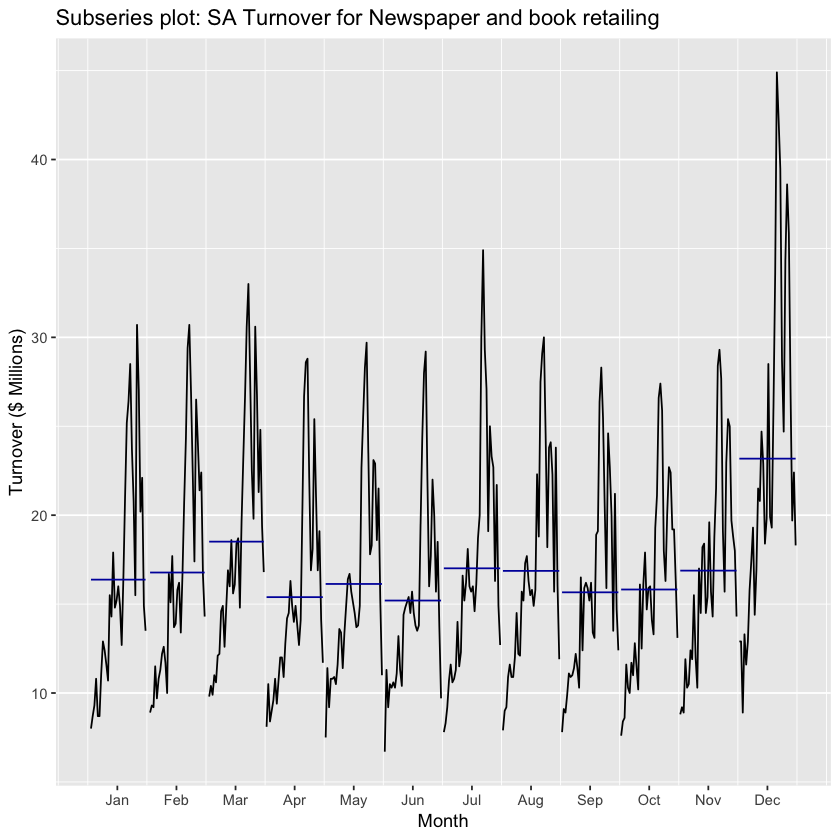

In [9]:
#ggsubseriesplot
ggsubseriesplot(myts) + ylab("Turnover ($ Millions)") + ggtitle("Subseries plot: SA Turnover for Newspaper and book retailing")

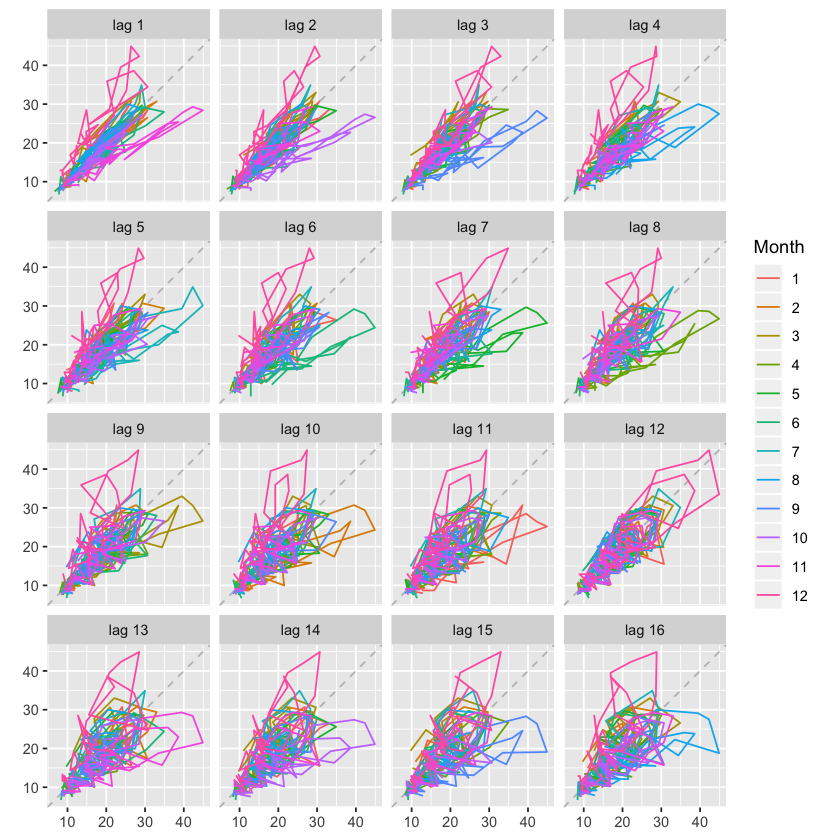

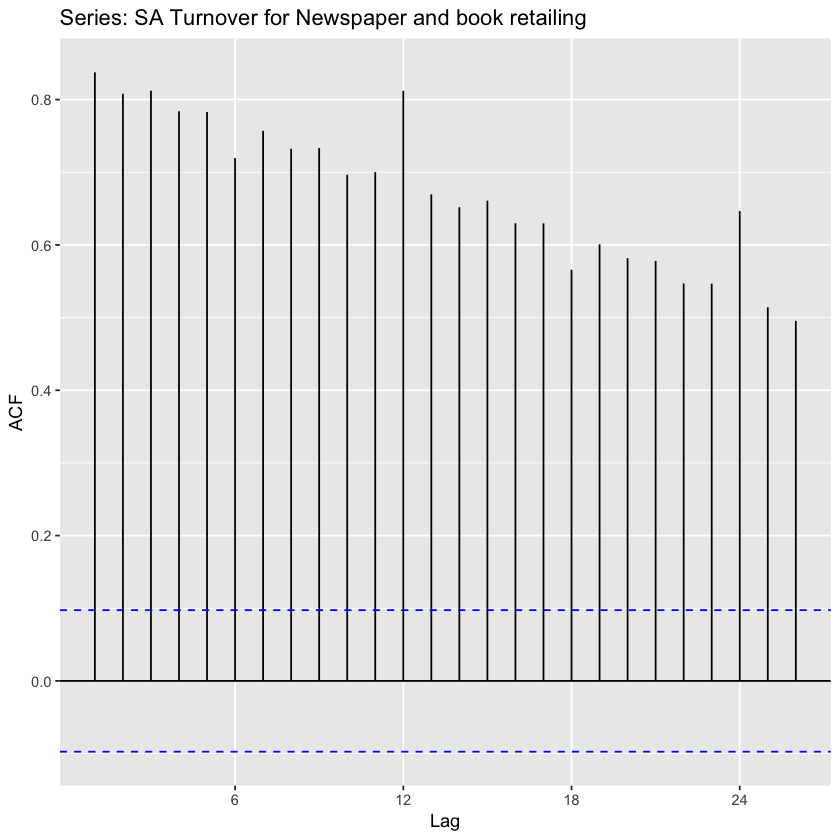

In [10]:
#gglagplot
gglagplot(myts)
ggAcf(myts) + ggtitle("Series: SA Turnover for Newspaper and book retailing")

* There is a strong seasonal pattern with a jump in December and a drop in next month for each year. but the variation for this jump in december is not consistent, it first increasing, then decreasing in the last few years. A cycle existied as data exhibit rises and falls that are not of a fixed period.


### Q2 Would transforming your data be useful? 
It shows different variation at different levels of the series, apply transformation can make the pattern more consistent across the whole data set.
#### Compare different transformations graphically. 

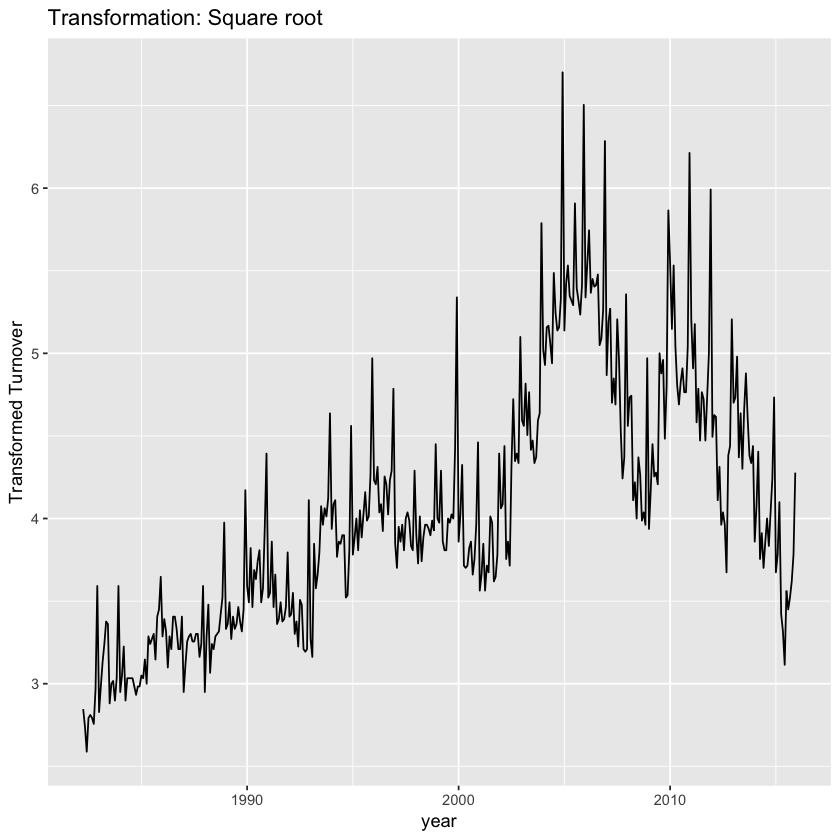

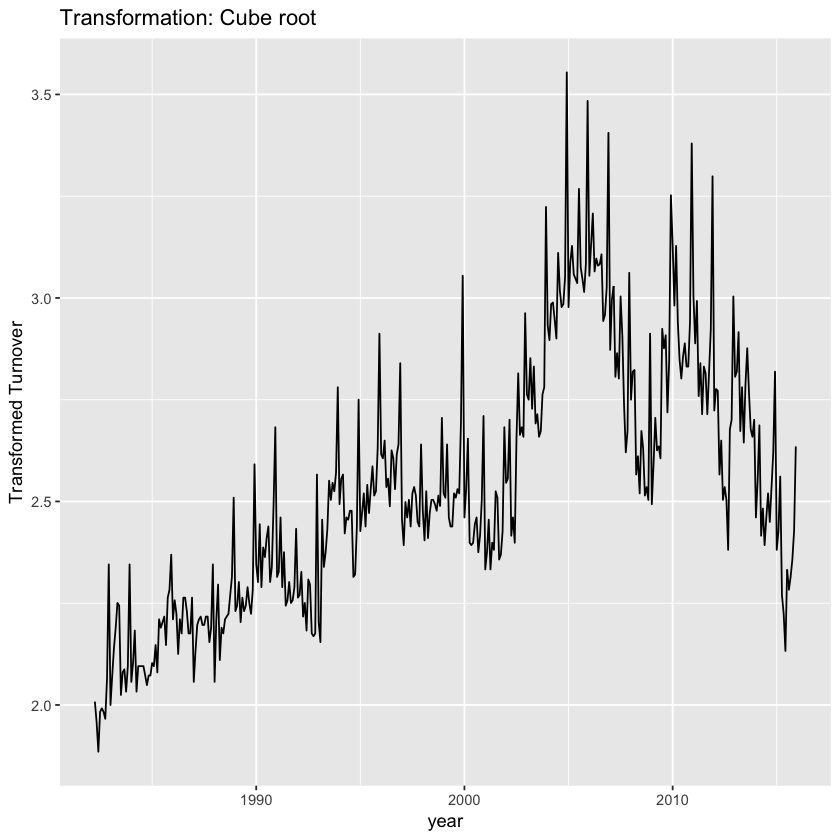

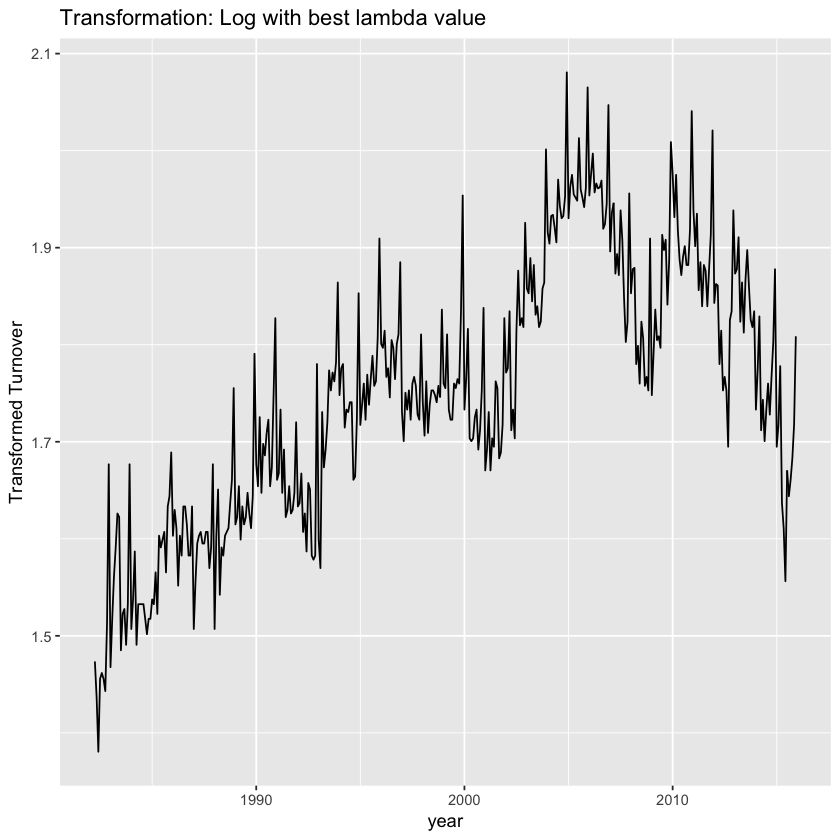

In [17]:
#Tranform data comparison
autoplot(myts^0.5)+
  ggtitle("Transformation: Square root")+
  xlab("year")+
  ylab("Transformed Turnover") 

autoplot(myts^0.33333)+
  ggtitle("Transformation: Cube root")+
  xlab("year")+
  ylab("Transformed Turnover") 

autoplot(BoxCox(myts,lambda = BoxCox.lambda(myts)))+
  ggtitle("Transformation: Log with best lambda value ")+
  xlab("year")+
  ylab("Transformed Turnover") 

* A log transformation with lambda = -0.2563538 (chosen by using BoxCox) work best, compared to square root and Cube root transformation. As it performs better than others in making the size of the seasonal variation to be closer to the same across the whole series.


### Q3 Split your data into training and test sets. 

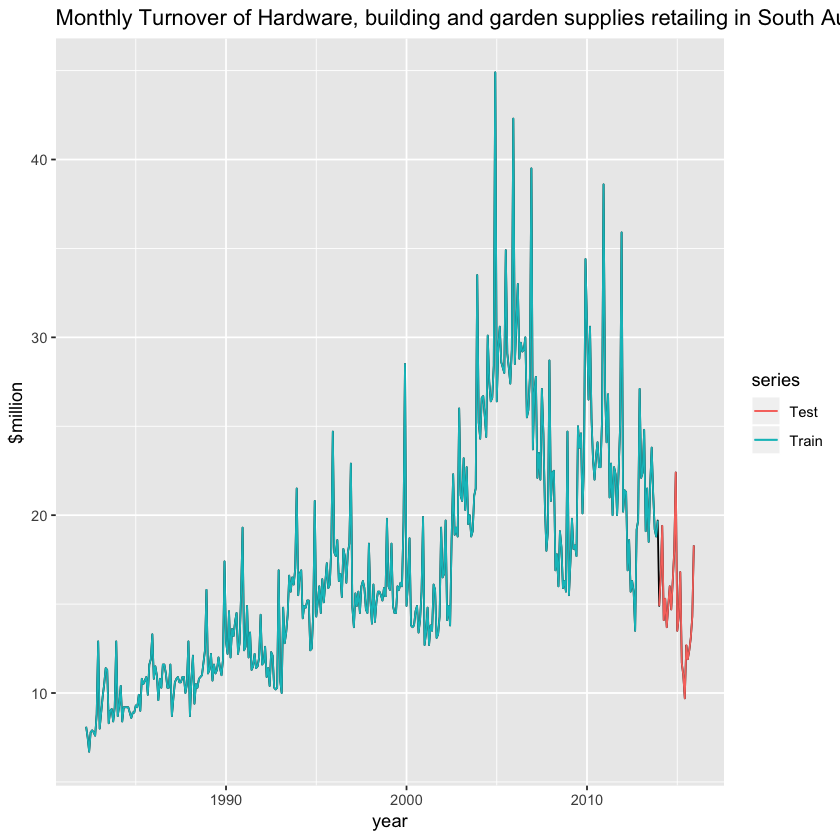

In [18]:
#Split the dataset of non-transformed data
myts.train <- subset(myts, end = length(myts)-12*2)
myts.test <- subset(myts, start = length(myts)-12*2+1)
autoplot(myts) +
  autolayer(myts.train, series="Train") +
  autolayer(myts.test, series="Test")+
  ggtitle("Monthly Turnover of Hardware, building and garden supplies retailing in South Australia")+
  xlab("year")+
  ylab("$million")

### Q4 Benchmark methods for time series forecasting 
* Apply all four benchmark methods on the training set. 
* Generate forecasts for the test set and plot them on the same graph.
* Compare their forecasting performance on the test set. 

In [19]:
#Forecast/Benchmarks
myts_snaive <-snaive(myts.train, h=length(myts.test))  
myts_mean <- meanf(myts.train, h=length(myts.test))
myts_drift <- rwf(myts.train, h=length(myts.test), drift = T)
myts_naive <-naive(myts.train, h=length(myts.test))  

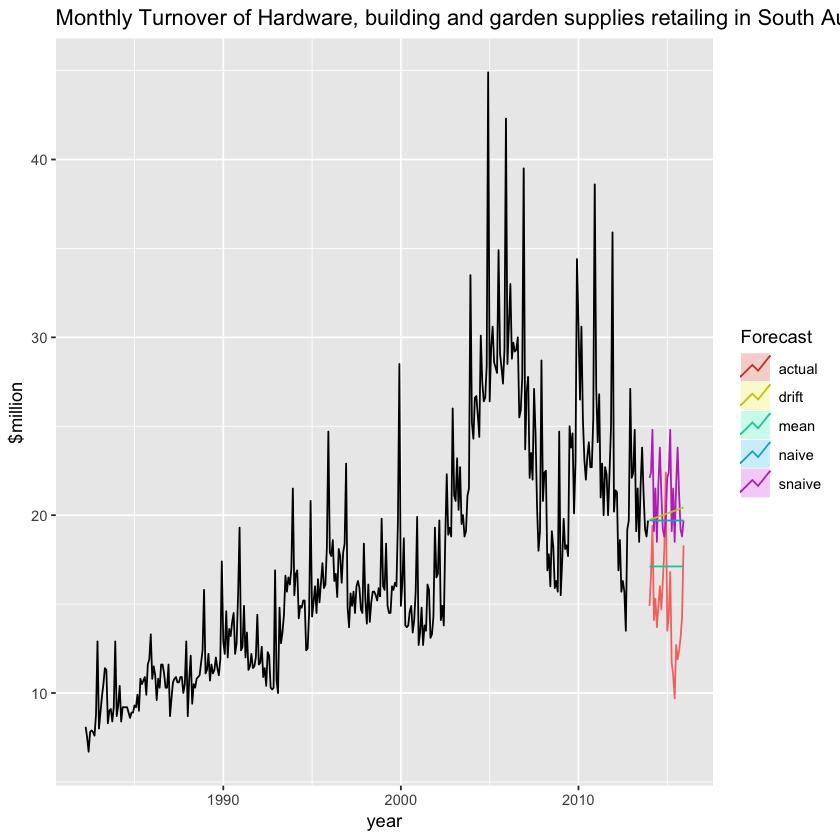

In [20]:
#4 benchmarks
autoplot(myts.train)+
  autolayer(myts.test, series = "actual")+
  autolayer(myts_snaive, PI=F, series = "snaive")+
  autolayer(myts_mean, PI=F, series = "mean")+
  autolayer(myts_drift, PI=F, series = "drift")+
  autolayer(myts_naive, PI=F, series = "naive")+
  ggtitle("Monthly Turnover of Hardware, building and garden supplies retailing in South Australia")+
  xlab("year")+
  ylab("$million")+
  guides(colour=guide_legend(title="Forecast"))

In [22]:
#Accuracy of forecast
accuracy(myts_snaive, myts) #right = whole series or test set all works
accuracy(myts_mean, myts)
accuracy(myts_drift, myts)
accuracy(myts_naive, myts)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4092141,3.599337,2.652575,1.257132,14.50263,1.000000,0.7821146,NA
Test set,-6.2333333,6.988920,6.458333,-46.492192,47.49666,2.434742,0.4899025,2.980718


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.238130e-15,6.620651,5.280341,-14.62549,34.46609,1.990648,0.8413524,NA
Test set,-2.284514e+00,3.612879,3.086899,-19.44653,23.33865,1.163737,0.3987069,1.593286


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-7.138134e-15,3.702988,2.298643,-1.520074,12.63023,0.8665704,-0.4196395,NA
Test set,-5.248246e+00,5.986148,5.442719,-40.238096,41.10628,2.0518629,0.4376293,2.621063


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.03052632,3.703114,2.301053,-1.316116,12.63560,0.867479,-0.4196395,NA
Test set,-4.86666667,5.614119,5.091667,-37.464517,38.46898,1.919519,0.3987069,2.447254


In [23]:
tab <- matrix(NA, ncol = 4, nrow=4)
tab[1,] <- accuracy(myts_mean, myts)[2,c(2,3,5,6)]
tab[2,] <- accuracy(myts_naive, myts)[2,c(2,3,5,6)]
tab[3,] <- accuracy(myts_drift, myts)[2,c(2,3,5,6)]
tab[4,] <- accuracy(myts_snaive, myts)[2,c(2,3,5,6)]
colnames(tab)<- c("RMSE","MAE","MAPE","MASE")
rownames(tab)<- c("mean","naive","drift","snaive")
tab # tabulate predict error for two method

,RMSE,MAE,MAPE,MASE
mean,3.612879,3.086899,23.33865,1.163737
naive,5.614119,5.091667,38.46898,1.919519
drift,5.986148,5.442719,41.10628,2.051863
snaive,6.988920,6.458333,47.49666,2.434742


* The two most appropriate benchmark methods would be seasonal naive method for series has strong seasonality and mean method for using average turnover of previous months for the prediction.Compare the forecasting performance by looking at test error for these two method (as below table), seasonal naive method is better than mean method as it return much lower value for all 4 error measurement. It is because as the series is consider stable with little change of variation and decreasing trend over the previous 2 to 5 years, seasonal naive method work well that use the last year observations as the prediction for the short term future while remaining the series seasonality. And the mean method not perform well as the prediction is much lower than the last year's observations. 


###  Q5 Residual analysis

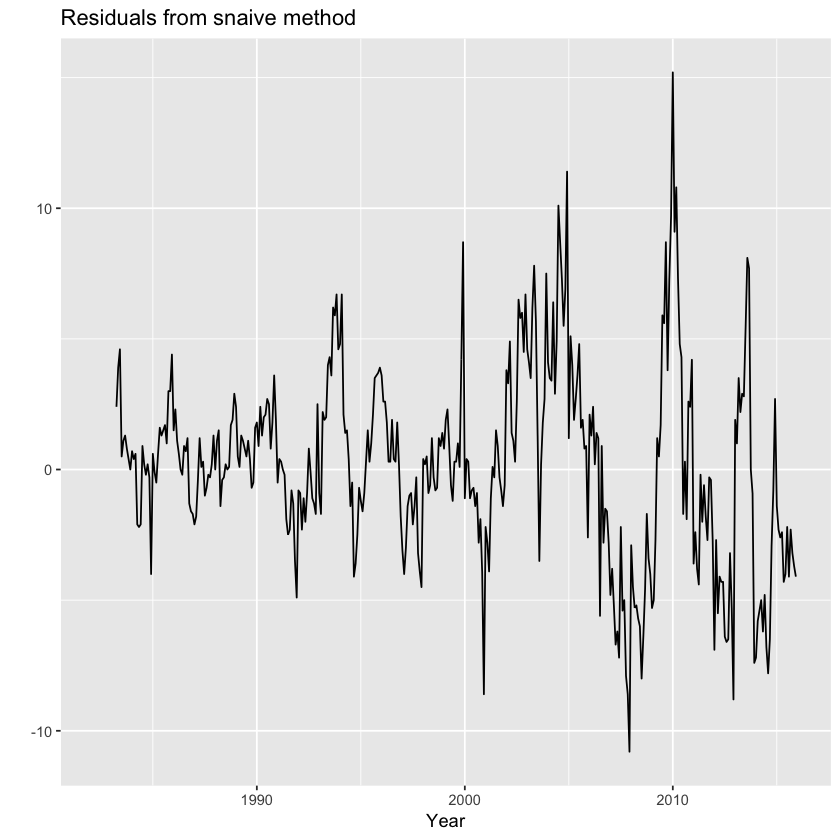

Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”

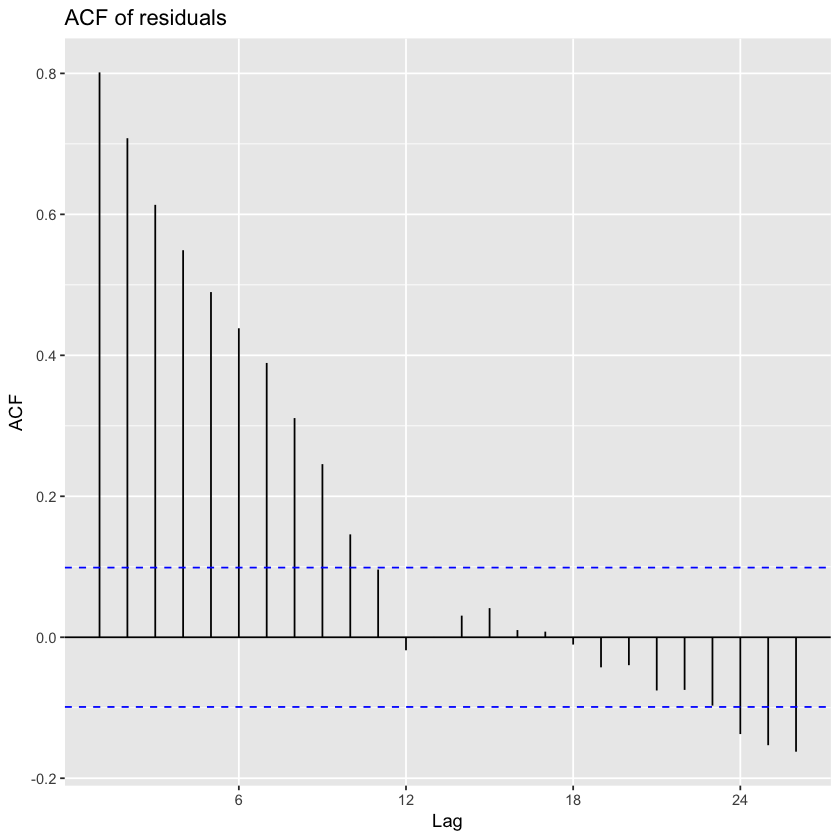

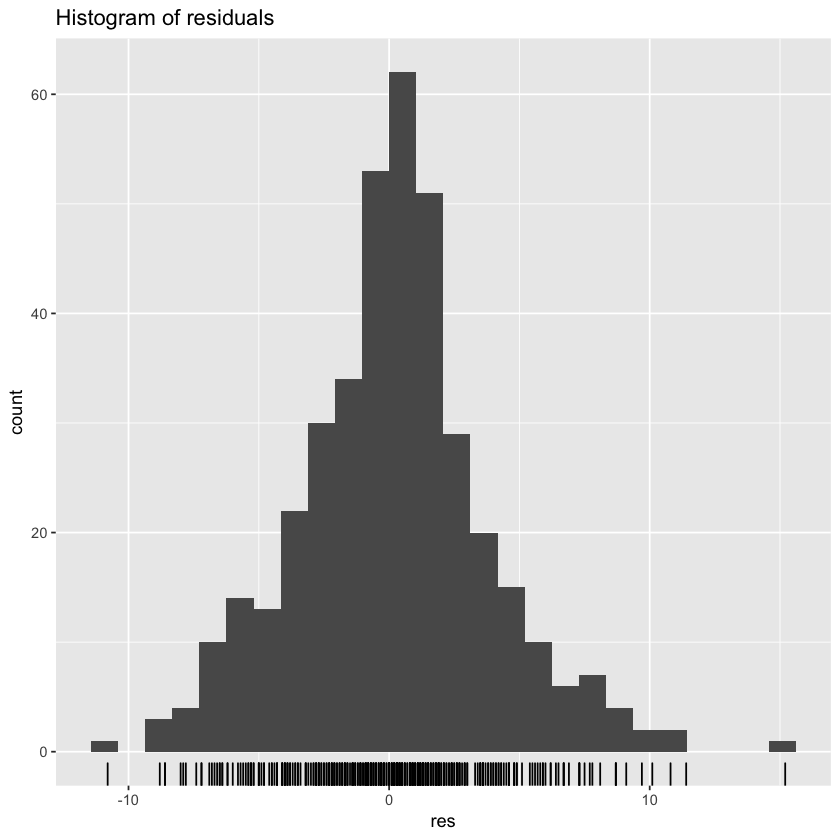


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 1052.6, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



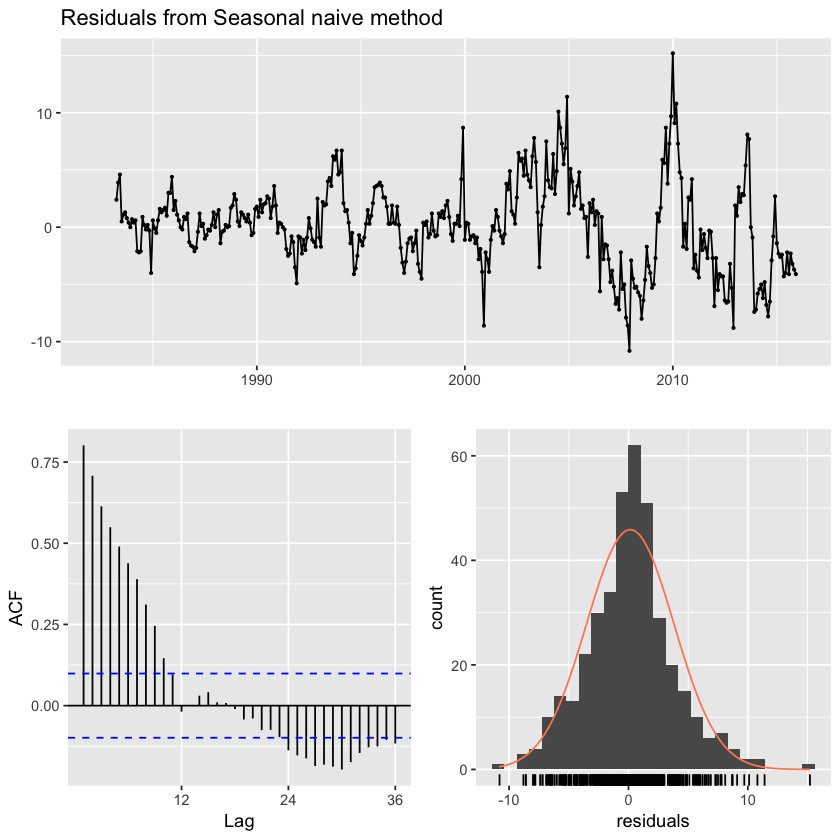

In [24]:
res <- residuals(snaive(myts))  
autoplot(res) + xlab("Year") + ylab("") + ggtitle("Residuals from snaive method")
ggAcf(res) + ggtitle("ACF of residuals")
gghistogram(res) + ggtitle("Histogram of residuals") 
checkresiduals(snaive(myts)) 

* ACF plot show the method produces forecasts that appear to capture the yearly seasonality that a sudden large jump in month of December, but it fail to account for the information that has trend exist in series and the variation increasing as the level of the series increases. P-value in Ljung-Box test is very small that the residuals series is not a white noise. Method is not good and can be improved.


### Q6 Generate point forecasts for the next 2 years (2016-2017) from the benchmark method you considered best and plot them. 

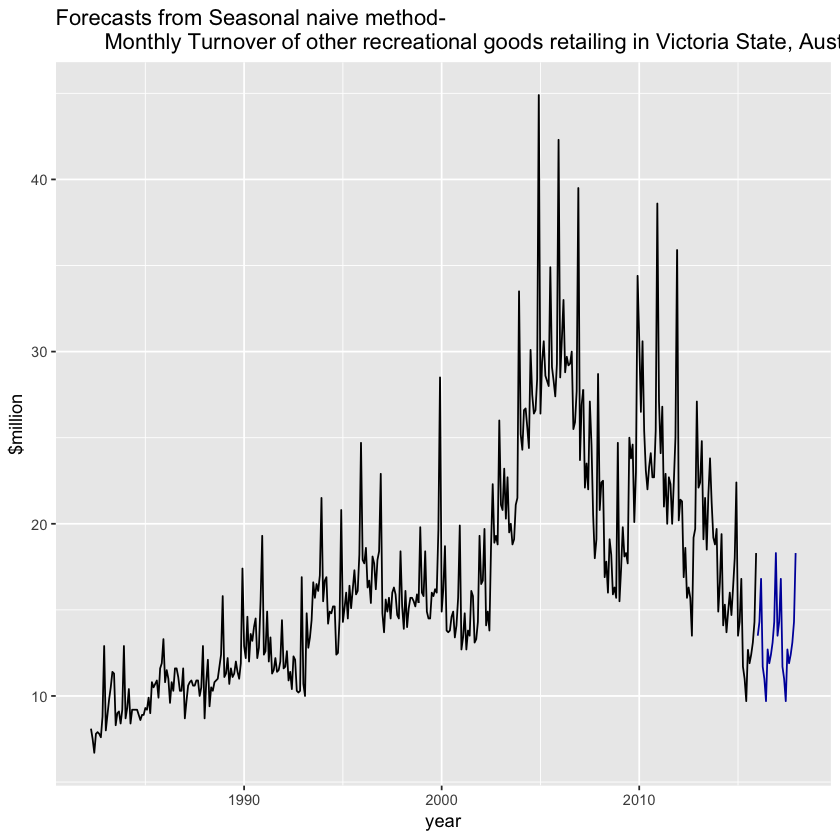

In [25]:
myts.f <- snaive(myts, h=12*2, lambda= BoxCox.lambda(myts) )
autoplot(myts.f,PI=F)+ 
  ggtitle("Forecasts from Seasonal naive method-
        Monthly Turnover of other recreational goods retailing in Victoria State, Australia")+
  xlab("year")+
  ylab("$million")

* As seasonal naive method uses the last year's observations for the prediction of the value for different month for year 2016 and 2017, the forecasted time series remain the same seasonality as we want for our short-term prediction. However, the method didn't capture the little increasing variation and little decreasing change for the series. 
